In [56]:
import numpy as np
from data import *
from soga import *
from lshade import *
from evaluate import *
import pickle

In [13]:
def converse_data_from_file(path):
    with open(path, 'r') as f:
        q = int(360/int(f.readline()))
        radius = float(f.readline())
        max_x, max_y = f.readline().split(',')
        area = ((0, int(max_x)), (0, int(max_y)))
        m = int(f.readline())
        n = int(f.readline())

        sensors, targets, K = [], [], []
        for _ in range(m):
            line = f.readline().split(',')
            x, y, k = float(line[0]), float(line[1]), int(float(line[2]))
            targets.append([x, y])
            K.append(k)
        for _ in range(n):
            line = f.readline().split(',')
            x, y = float(line[0]), float(line[1])
            sensors.append([x, y])
        
        data = Data(n=n,
                    m=m,
                    q=q,
                    K=np.array(K),
                    radius=radius,
                    area=area,
                    sensors=np.array(sensors),
                    targets=np.array(targets))
        return data

In [29]:
data = converse_data_from_file('./saved/data/continuous-view-data/test_gr1_60sensor.inp')
data

Data(n=60, m=130, q=4, K=array([2, 4, 3, 2, 1, 2, 1, 1, 2, 4, 2, 4, 2, 1, 1, 1, 3, 2, 2, 2, 2, 1,
       1, 4, 3, 1, 2, 1, 2, 4, 4, 4, 1, 4, 3, 1, 4, 2, 3, 4, 4, 1, 1, 1,
       3, 4, 1, 2, 4, 2, 4, 2, 1, 4, 3, 4, 1, 3, 3, 4, 2, 2, 4, 1, 3, 1,
       2, 1, 3, 4, 4, 3, 2, 2, 2, 3, 2, 2, 3, 2, 1, 3, 3, 2, 3, 3, 1, 1,
       2, 1, 3, 2, 4, 3, 2, 1, 2, 3, 3, 1, 2, 4, 1, 1, 2, 3, 3, 2, 1, 3,
       1, 4, 1, 2, 3, 4, 4, 2, 4, 3, 2, 2, 3, 3, 4, 4, 4, 2, 3, 1]), radius=100.0, sensors=array([[ 15.76465672, 483.66490232],
       [146.07147232, 375.69388516],
       [218.72635423, 387.15113086],
       [ 45.55533046, 137.22199077],
       [357.99932485, 320.47998104],
       [124.83081125, 444.75474688],
       [281.15532891, 295.52477498],
       [489.22799399, 291.7972152 ],
       [ 92.46239754, 309.30985498],
       [410.39919624,  46.39681835],
       [437.41238007,  76.01753719],
       [ 41.38424362, 245.78566468],
       [230.86950334,  24.02542427],
       [258.66333181, 336.19112058],
 

In [47]:
continuous_dataset = {'inc-target':[], 'inc-sensor':[], 'inc-sensing':[]}

In [48]:
inc_sensor = {'small':[]}
inc_target = {'small':[]}
inc_sensing = {'small':[]}

In [49]:
inc_sensor['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr1_20sensor.inp'))
inc_sensor['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr1_40sensor.inp'))
inc_sensor['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr1_60sensor.inp'))
inc_sensor['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr1_80sensor.inp'))
inc_sensor['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr1_100sensor.inp'))
inc_sensor['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr1_120sensor.inp'))
inc_sensor['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr1_140sensor.inp'))
inc_sensor['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr1_160sensor.inp'))
inc_sensor['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr1_180sensor.inp'))

continuous_dataset['inc-sensor'].append(inc_sensor)

In [50]:
inc_target['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr2_10target.inp'))
inc_target['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr2_30target.inp'))
inc_target['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr2_50target.inp'))
inc_target['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr2_70target.inp'))
inc_target['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr2_90target.inp'))
inc_target['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr2_110target.inp'))
inc_target['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr2_130target.inp'))
inc_target['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr2_150target.inp'))

continuous_dataset['inc-target'].append(inc_target)

In [51]:
inc_sensing['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr3_60sensing.inp'))
inc_sensing['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr3_70sensing.inp'))
inc_sensing['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr3_80sensing.inp'))
inc_sensing['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr3_90sensing.inp'))
inc_sensing['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr3_100sensing.inp'))
inc_sensing['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr3_110sensing.inp'))
inc_sensing['small'].append(converse_data_from_file('./saved/data/continuous-view-data/test_gr3_120sensing.inp'))

continuous_dataset['inc-sensing'].append(inc_sensing)

In [57]:
with open('./saved/continuous-dataset.pkl', 'wb') as f:
    pickle.dump(continuous_dataset, f)

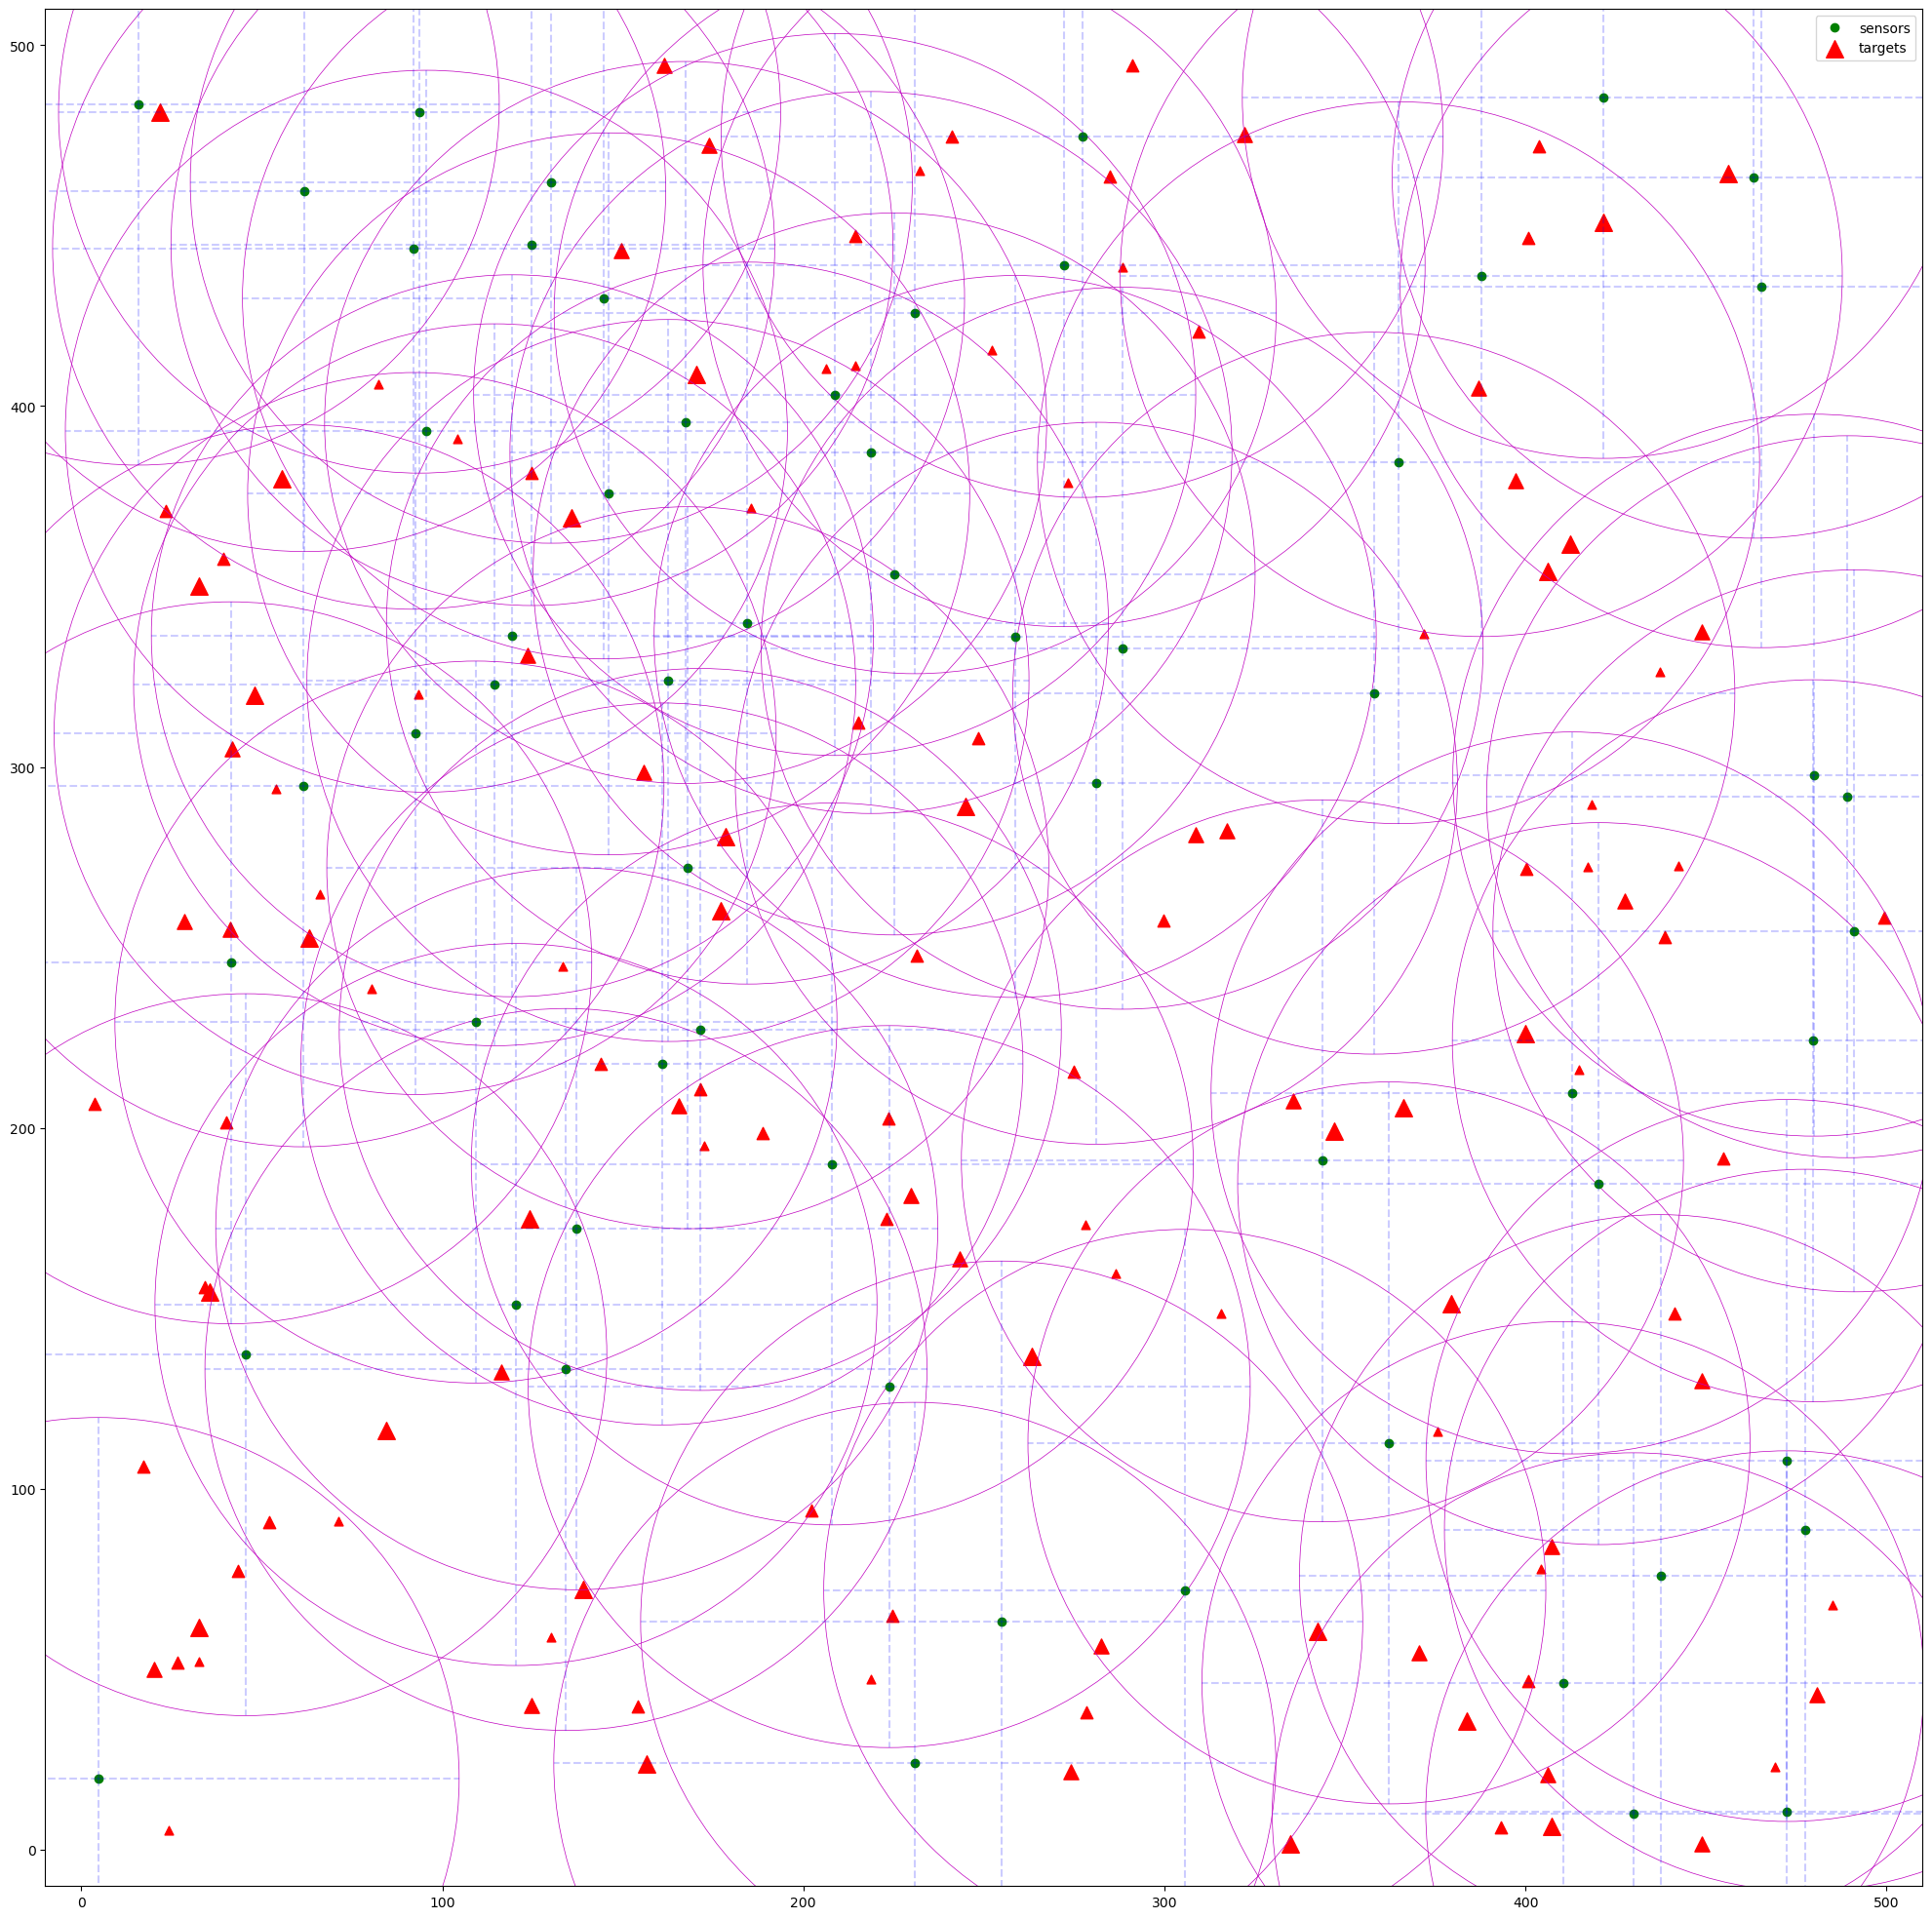

In [30]:
show_network(data, figsize=(25,25))

In [33]:
network = data

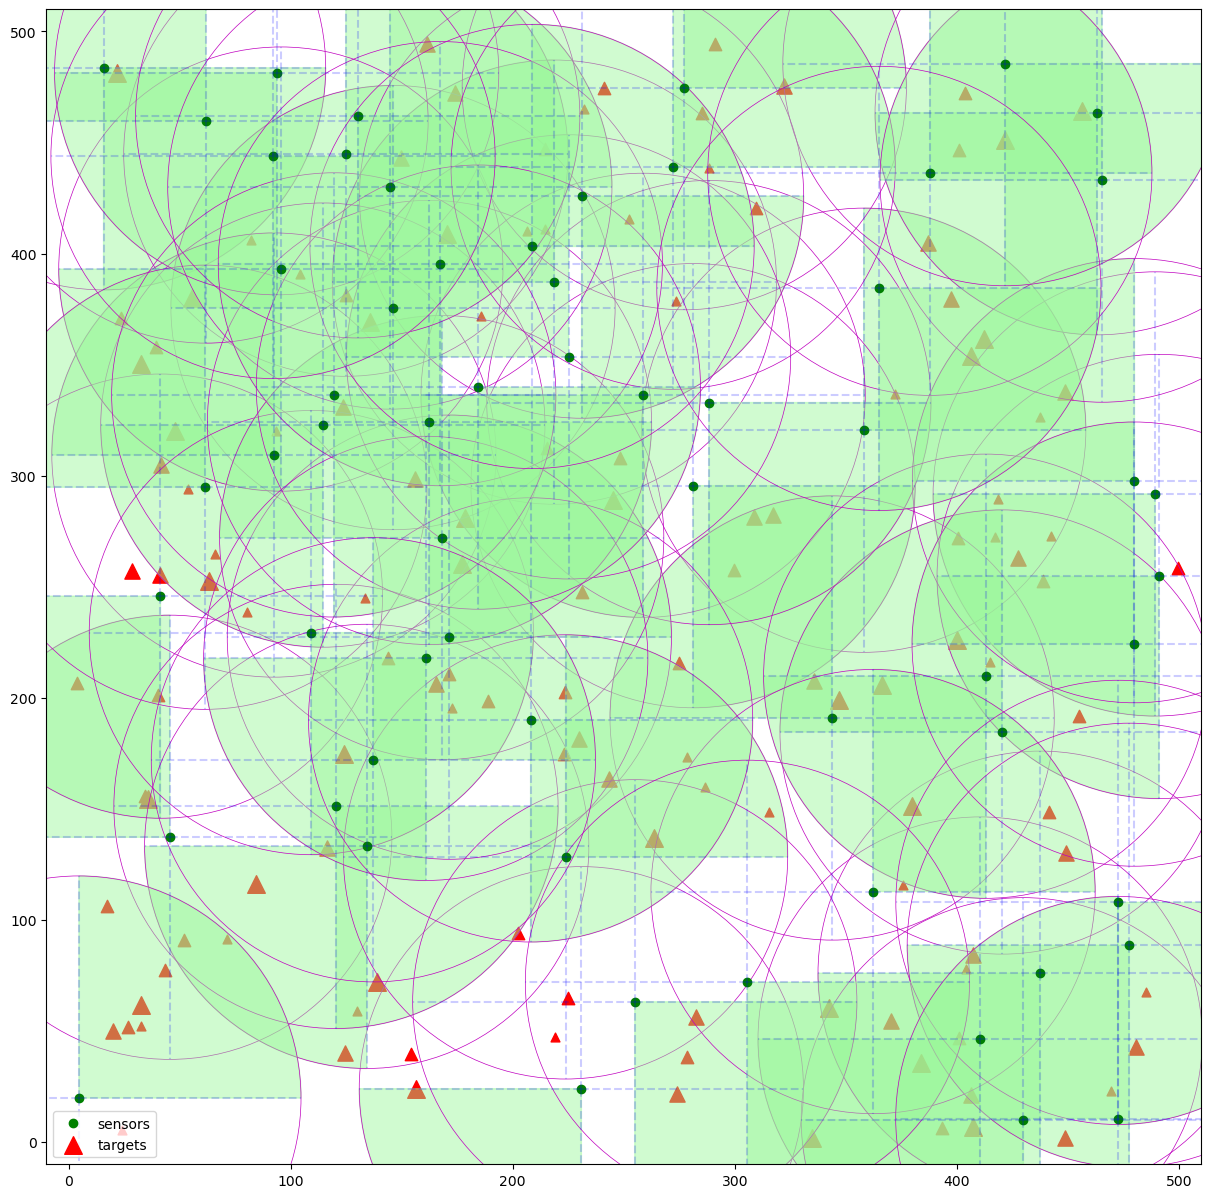

In [34]:
solver = SOGA()
solver.adapt(network)
C, a = solver.solve(mode='prioritize')
C[C == None] = solver.q
show_network(network, sensors_mask=C, figsize=(15, 15))

In [35]:
distance_index(network, C)

0.8346028291621328

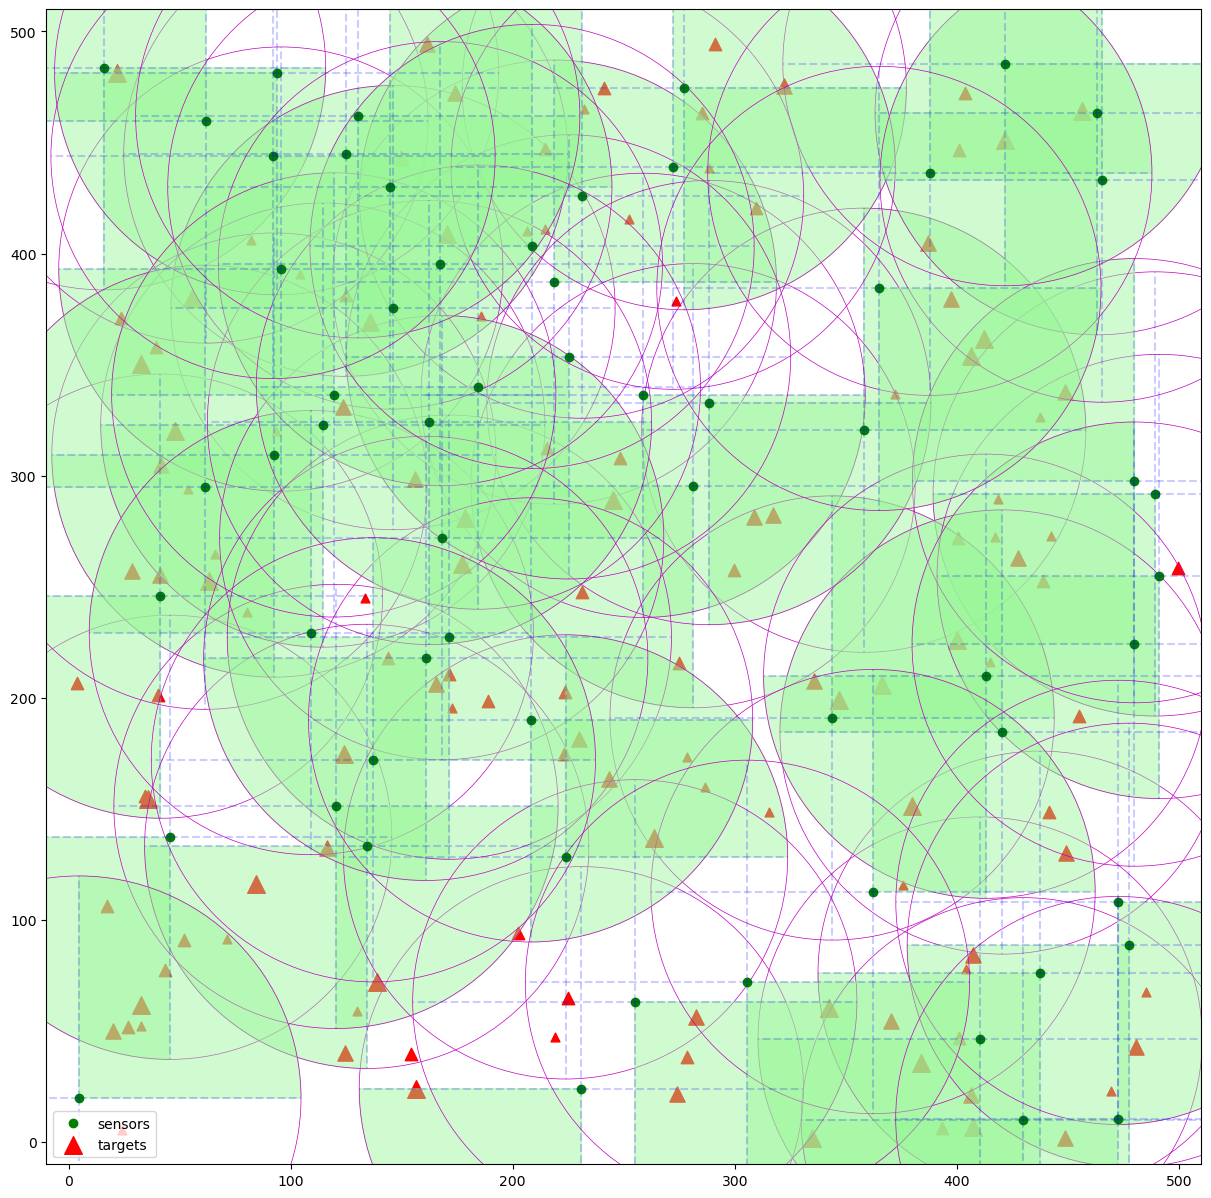

In [36]:
lshade = LSHADE()
lshade.adapt(network)
bound_values = np.repeat([[-0.5, 4.5]], network.n, axis=0)
config = LSHADEConfig(
    population_size=network.n*18,
    memory_size=15,
    max_evals=2000*network.n,
    bounds=bound_values,
    seed=29,
    useless_penalty=6,
    activated_penalty=0.001)
best, best_val, hist = lshade.solve(config)
show_network(network, sensors_mask=np.round(best).astype(int), figsize=(15, 15))

In [38]:
distance_index(network, sensors_mask=np.round(best).astype(int))

0.8498367791077258